# Explore data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [4]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222088 entries, 0 to 222087
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  222088 non-null  object
 1   date            222088 non-null  object
 2   value           222088 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [5]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [6]:
sns.set_style("whitegrid")

In [7]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

## Appearance of new covid-19 cases in latam

In [8]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


In [9]:
import final_project.visualization.visualize as visualize

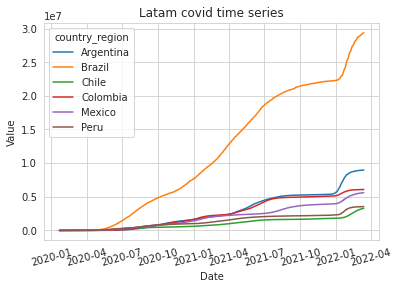

In [10]:
visualize.covid_time_series(some_latam_countries_df)

# Latam in global context

In [11]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,20240166054,lightblue
1,India,13218644932,lightblue
2,Brazil,8975149924,red
3,France,3714173039,lightblue
4,United Kingdom,3658988264,lightblue


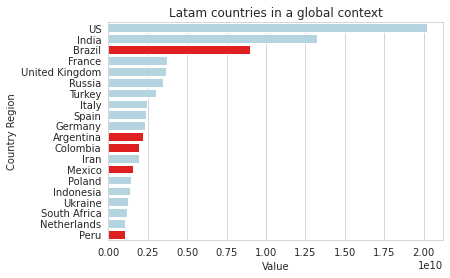

In [12]:
visualize.top_countries_covid(top_countries_df)